In [1]:
#%%
import os
import time

import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
img_src0 = cv2.imread('lena_gray.png',0)

In [3]:
# 高斯滤波
img_gs1 = cv2.GaussianBlur(img_src0,ksize=(5,5),sigmaX=0.8)
# 下采样
height,width = img_gs1.shape 
img_down2 = np.array((height//2,width//2))
img_down2 = img_gs1[::2,::2]
# 上采样：近邻法插值
img_up2 = cv2.resize(img_down2,dsize=(height,width),interpolation=cv2.INTER_LINEAR)
# 差分 注意不能直接减，np.uint8(1)-np.uint8(10) = 247,实际图像运算应该记作0
img_diff = cv2.subtract(img_src0 , img_up2  )

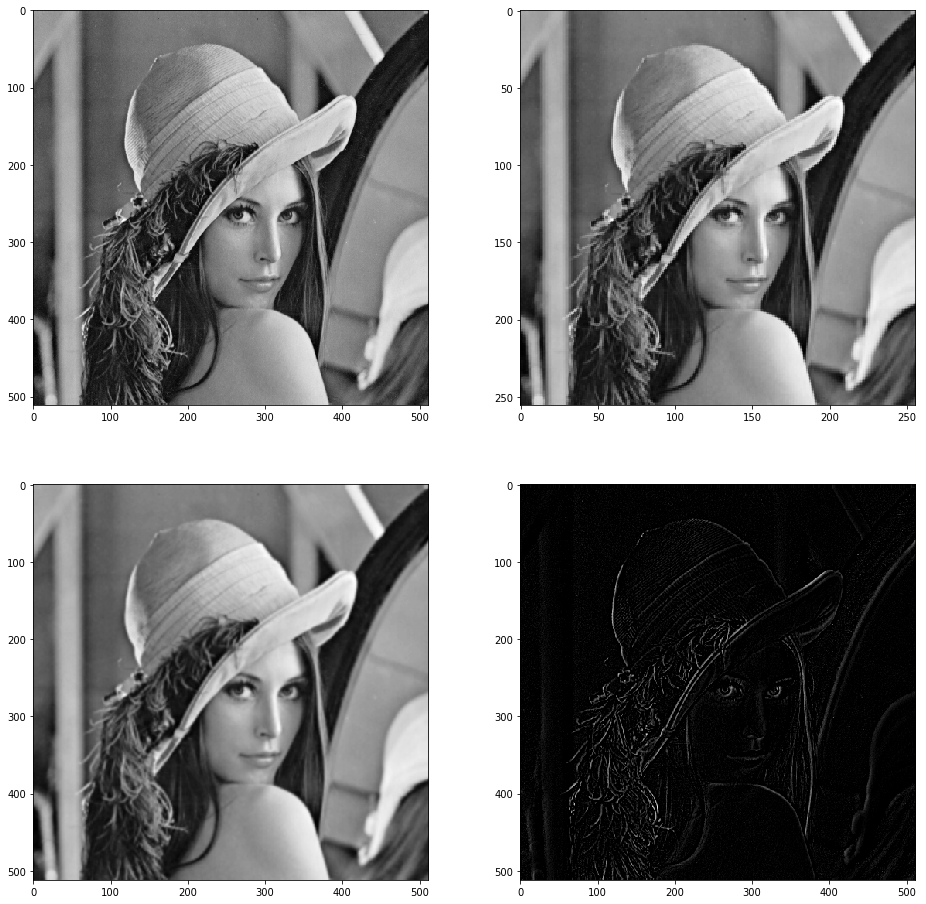

In [4]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(img_src0,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(img_down2,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(img_up2,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(img_diff,cmap='gray')

In [5]:
# 图像金字塔
list_pyramid  = []
list_diff = []
img_pyd = img_src0.copy()
totalwidth = img_pyd.shape[1]
totalheight = img_pyd.shape[0]
list_shape = []
list_shape.append(img_pyd.shape)
list_pyramid.append(img_pyd)
for j in range(6):
    # 高斯模糊
    img_gs1 = cv2.GaussianBlur(img_pyd,ksize=(5,5),sigmaX=0.8)
    # 下采样
    height,width = img_gs1.shape 
    img_down2 = np.array((height//2,width//2))
    img_down2 = img_gs1[::2,::2]
    # 上采样：近邻法插值
    _img_up2 = cv2.resize(img_down2,dsize=(height,width),interpolation=cv2.INTER_LINEAR)
    # same kernel times 4 
    img_up2 = cv2.GaussianBlur(_img_up2,ksize=(5,5),sigmaX=0.8)
    # 差分
    img_diff = cv2.subtract(img_pyd, img_up2 )
    list_diff.append(img_diff)
    img_pyd = img_down2
    list_pyramid.append(img_pyd)
    totalwidth+=img_pyd.shape[1]
    list_shape.append(img_pyd.shape)

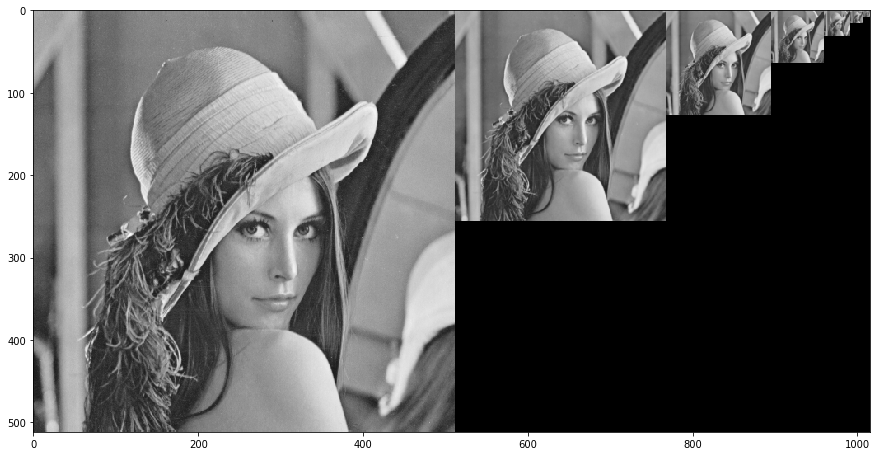

In [6]:
img_show = np.zeros((totalheight,totalwidth),dtype=np.uint8)
width = 0
ws = 0
for img,(h,w) in zip(list_pyramid,list_shape):
    width += w
    img_show[:h,ws:width] = img 
    ws = width 
plt.figure(figsize=(15,8))
plt.imshow(img_show,cmap='gray')

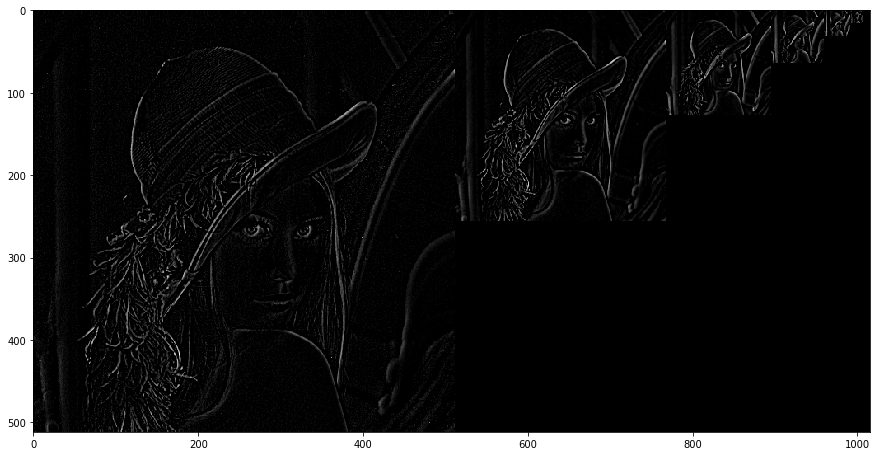

In [7]:
img_show = np.zeros((totalheight,totalwidth),dtype=np.uint8)
width = 0
ws = 0
for img,(h,w) in zip(list_diff,list_shape):
    width += w
    img_show[:h,ws:width] = img 
    ws = width 
plt.figure(figsize=(15,8))
plt.imshow(img_show,cmap='gray')

In [8]:
# for i,img in enumerate(list_pyramid):
#     cv2.imshow(f'pyramid_{i}',img)
# for i,img in enumerate(list_diff):
#     cv2.imshow(f'diff_{i}',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [9]:
# # 用opencv的上采样和下采样
# A = img_src0.copy()
# # generate Gaussian pyramid for A
# G = A.copy()
# gpA = [G]
# for i in range(6):
#     G = cv2.pyrDown(G)
#     gpA.append(G)

# # generate Laplacian Pyramid for A
# lpA = [gpA[5]]
# for i in range(5,0,-1):
#     GE = cv2.pyrUp(gpA[i])
#     L = cv2.subtract(gpA[i-1],GE)
#     lpA.append(L)

In [10]:
# for i,img in enumerate(gpA):
#     cv2.imshow(f'pyramid_{i}',img)
# for i,img in enumerate(lpA):
#     cv2.imshow(f'diff_{i}',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()